<a href="https://colab.research.google.com/github/ClovisL/Analyzing-tumor-development/blob/main/Pymaceuticals/pymaceuticals_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "https://raw.githubusercontent.com/ClovisL/Analyzing-tumor-development/main/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "https://raw.githubusercontent.com/ClovisL/Analyzing-tumor-development/main/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview, both beginning and end of table
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
study_data_complete["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = study_data_complete["Mouse ID"].value_counts()
duplicates = pd.DataFrame(duplicates)
duplicates = duplicates.rename(columns={"Mouse ID" : "Counts of Mouse ID"})
duplicates

,Counts of Mouse ID
g989,13
b128,10
q787,10
s337,10
q511,10
...,...
f932,1
b447,1
u153,1
t573,1


In [4]:
# Get all the data for the duplicate mouse ID. 
# Set the index to mouse ID
study_data = study_data_complete.set_index("Mouse ID")

# Check the mouse data for ID
g989 = study_data.loc["g989",:]
g989

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data = study_data.reset_index()
study_data = study_data.drop_duplicates()
study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
study_data["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Tumor volume grouped by drug regimen
tumor_volume = study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

# Statistics for tumor volume
tumor_volume_mean = tumor_volume.mean()
tumor_volume_median = tumor_volume.median()
tumor_volume_variance = tumor_volume.var()
tumor_volume_std = tumor_volume.std()
tumor_volume_sem = tumor_volume.sem()

# Creating the data frame
drug_tumor_df = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean,
                                    "Median Tumor Volume": tumor_volume_median,
                                    "Tumor Volume Variance": tumor_volume_variance,
                                    "Tumor Volume Std.Dev": tumor_volume_std,
                                    "Tumor Volume SEM": tumor_volume_sem})

drug_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_df = study_data.groupby("Drug Regimen").agg(Mean_Tumor_Volume = ("Tumor Volume (mm3)", np.mean),
                                                        Median_Tumor_Volume = ("Tumor Volume (mm3)", np.median),
                                                        Variance_Tumor_Volume = ("Tumor Volume (mm3)", np.var),
                                                        Tumor_Volume_Std_Dev = ("Tumor Volume (mm3)", np.std),
                                                        Tumor_Volume_SEM = ("Tumor Volume (mm3)", st.sem)
)
drug_tumor_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas and pyplot.

# Gets mice count per drug
mice_by_drug_group = study_data.groupby(["Drug Regimen"])["Mouse ID"].nunique()
mice_by_drug_df = pd.DataFrame(mice_by_drug_group)
mice_by_drug_df = mice_by_drug_df.reset_index()
mouse_count = mice_by_drug_df["Mouse ID"]

# Drop duplicates
study_data_mice = study_data.drop_duplicates("Mouse ID")

# List of unique drug regimens
drug_regimens = mice_by_drug_df["Drug Regimen"].unique()

# Set drug regimen as x axis, and sets tick locations
x_axis = np.arange(mice_by_drug_df["Drug Regimen"].nunique())
tick_locations = [value for value in x_axis]

study_data_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


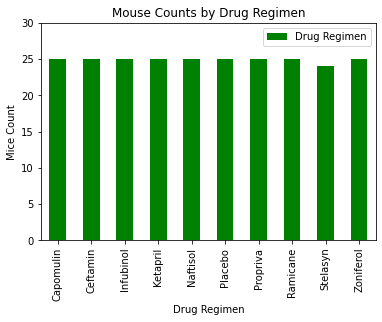

In [10]:
# Create bar plot using pandas
mice_by_drug_df = mice_by_drug_df.set_index("Drug Regimen")
bar_plot = mice_by_drug_df.plot.bar(title="Mouse Counts by Drug Regimen", color="g", ylim=[0, max(mouse_count)+5])
bar_plot.set(ylabel="Mice Count")
bar_plot.legend(["Drug Regimen"])

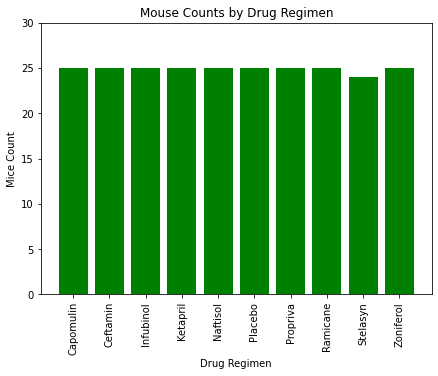

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(7,5))
plt.bar(x_axis, mouse_count, color="g", alpha=1, align="center")
plt.xticks(tick_locations, drug_regimens, rotation="vertical")
plt.ylim(0, max(mouse_count)+5)
plt.title("Mouse Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()

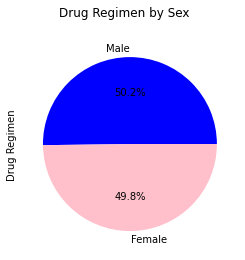

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Groups mice by sex
mice_by_sex_group = study_data_mice.groupby(["Sex"])["Drug Regimen"].count()
mice_by_sex_df = pd.DataFrame(mice_by_sex_group)
mice_by_sex_df = mice_by_sex_df.reindex(["Male", "Female"])
pie_plot = mice_by_sex_df.plot.pie(subplots=True, legend=False, title="Drug Regimen by Sex",
                                   autopct="%1.1f%%", colors=["blue", "pink"])

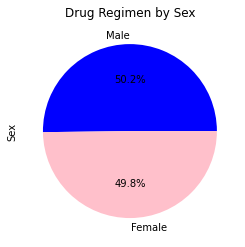

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_by_sex_df = mice_by_sex_df.reset_index()
plt.pie(mice_by_sex_df["Drug Regimen"], labels=mice_by_sex_df["Sex"], autopct="%1.1f%%", colors=["blue", "pink"])
plt.ylabel("Sex")
plt.title("Drug Regimen by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
four_drug_regimens = study_data.set_index("Drug Regimen")
four_drug_regimens = four_drug_regimens[four_drug_regimens.index.isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Isolated view of just capomulin for later use
capomulin_only = four_drug_regimens[four_drug_regimens.index == "Capomulin"]

# Reset index so drug regimen column persists after inner merge
four_drug_regimens = four_drug_regimens.reset_index()

# Get mouse count per drug
mouse_count_per_drug_group = four_drug_regimens.groupby(["Drug Regimen"])["Mouse ID"].count()
mouse_count_per_drug_df = pd.DataFrame(mouse_count_per_drug_group)
mouse_count_per_drug_df = mouse_count_per_drug_df.rename(columns={"Mouse ID": "Mouse Count"})

# Start by getting the last (greatest) timepoint for each mouse
mice_by_timepoint_group = four_drug_regimens.groupby(["Mouse ID"])["Timepoint"].max()
mice_by_timepoint_df = pd.DataFrame(mice_by_timepoint_group)

mice_by_timepoint_df.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45


In [15]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_by_timepoint_df = mice_by_timepoint_df.reset_index()
merged_df = mice_by_timepoint_df.merge(study_data, how="left")

# Rearrange order of columns
merged_df = merged_df[["Mouse ID", "Drug Regimen", "Timepoint", 
                       "Tumor Volume (mm3)", "Metastatic Sites", "Sex", "Age_months", "Weight (g)"]]
# Sort order of data frame by timepoint
merged_df = merged_df.sort_values("Timepoint")

# Set index to Mouse ID
merged_df = merged_df.set_index("Mouse ID")

# Set to display all rows
pd.set_option('display.max_rows', None)

# Show all rows of data
merged_df

,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
t573,Ceftamin,0,45.000000,0,Female,15,27
u153,Ceftamin,0,45.000000,0,Female,11,25
x226,Ceftamin,0,45.000000,0,Male,23,28
b447,Ceftamin,0,45.000000,0,Male,2,30
v339,Infubinol,5,46.250112,0,Male,20,26
m756,Infubinol,5,47.010364,1,Male,19,30
h531,Ceftamin,5,47.784682,0,Male,5,27
w678,Ramicane,5,43.166373,0,Female,5,24
c326,Infubinol,5,36.321346,0,Female,18,25


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The median Tumor Volume is: {quartiles[0.5]} ")

# Locate the rows which contain mice on each drug and get the highest tumor volumes
drugs_df = pd.DataFrame(merged_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].max())
drugs_df = drugs_df.loc[treatments]
tumor_volume_list = (drugs_df["Tumor Volume (mm3)"].tolist())
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The median Tumor Volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


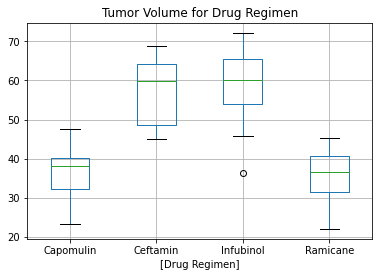

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = merged_df.boxplot(column=["Tumor Volume (mm3)"], by=["Drug Regimen"])
plt.suptitle("")
plt.title("Tumor Volume for Drug Regimen")
plt.show()

## Line and Scatter Plots

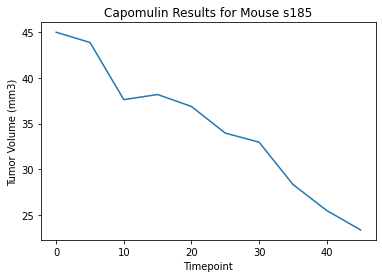

In [18]:
# Generate a line plot of tumor volume vs. time point for mouse s185 treated with Capomulin

# Change index to mouse ID
capomulin_only = capomulin_only.set_index("Mouse ID")

# Remove other mouse IDs so only s185 shows
s185 = capomulin_only.loc["s185"]

# Set the x-axis equal to the Timepoint and y-axis to Tumor Volume
tumor_time_line = plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"])
plt.title("Capomulin Results for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

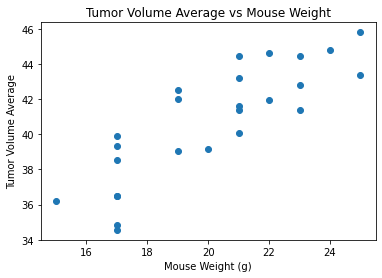

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Group by mouse weight to find average tumor volume
capomulin_only = capomulin_only.reset_index()
avg_tumor_group = capomulin_only.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_tumor_df = pd.DataFrame(avg_tumor_group)

# Establish x-axis value for the weight of the mice
weight_group = capomulin_only.groupby(["Mouse ID"])["Weight (g)"].mean()
weight_df = pd.DataFrame(weight_group)
x_axis = weight_df["Weight (g)"]

# Produce scatter plot of the data
plt.scatter(x=x_axis, y=avg_tumor_df["Tumor Volume (mm3)"])
plt.title("Tumor Volume Average vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


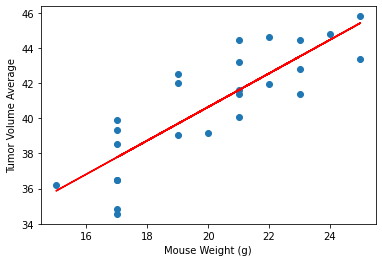

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
weight = weight_df["Weight (g)"]
tumor_volume_avg = avg_tumor_df["Tumor Volume (mm3)"]

# Print St. Pearson Correlation Coefficient
print(f"The correlation between both factors is {round(st.pearsonr(weight,tumor_volume_avg)[0],2)}")

# Establish linear regression values
wt_slope, wt_int, wt_r, wt_p, wt_std_err = st.linregress(weight, tumor_volume_avg)

# Linear regression line 
wt_fit = wt_slope * weight + wt_int

# Scatter plot of the data
plt.scatter(x=x_axis, y=avg_tumor_df["Tumor Volume (mm3)"])
plt.plot(weight, wt_fit, "-", color="r")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.show()